In [1]:
import numpy as np 
import pandas as pd 
import os
import cv2
import warnings
import datetime
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model 
from sklearn.metrics import confusion_matrix # Confusion matrix for model evaluation 
from tensorflow.keras.models import Sequential # Sequential model initialization
from sklearn.model_selection import train_test_split  # function to split sample data to train and test
from tensorflow.keras.optimizers import Adam, Nadam, Ftrl # Optimizer algorithms
from tensorflow.keras.metrics import categorical_crossentropy  # Loss functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers
from keras.regularizers import l2, l1
import visualkeras
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
from matplotlib import pyplot
warnings.filterwarnings('ignore')

In [2]:
class_names = os.listdir('..\\data-set\\skin-cancer\\data\\train')
class_types = len(os.listdir('..\\data-set\\skin-cancer\\data\\train'))
print('Number of classes for Classification: ',class_types)
print(f'The class names are {class_names[0]} and {class_names[1]}')
print('--> Count of Train Images <--')
for i in class_names:
    print(i + ':' + str(len(os.listdir('..\\data-set\\skin-cancer\\data\\train\\'+i))))
print('--> Count of Test Images <--')
for i in class_names:
    print(i + ':' + str(len(os.listdir('..\\data-set\\skin-cancer\\data\\test\\'+i))))

Number of classes for Classification:  2
The class names are benign and malignant
--> Count of Train Images <--
benign:1440
malignant:1197
--> Count of Test Images <--
benign:360
malignant:300


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '..\\data-set\\skin-cancer\\data\\train',
        target_size=(224,224),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '..\\data-set\\skin-cancer\\data\\test',
        target_size=(224,224),
        batch_size=8,
        class_mode='binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [4]:
for image_batch, labels_batch in train_generator:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 93312)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               23888128  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1

In [8]:
epochs=10
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  epochs=epochs,
    callbacks=[tensorboard_callback]
)

Epoch 1/10
 1/83 [..............................] - ETA: 0s - loss: 0.6985 - accuracy: 0.3750WARNING:tensorflow:From C:\Users\mdsoy\.conda\envs\tf-gpu\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
83/83 [==============================] - 120s 1s/step - loss: 0.6993 - accuracy: 0.6318 - val_loss: 0.5150 - val_accuracy: 0.6955
Epoch 2/10
83/83 [==============================] - 79s 952ms/step - loss: 0.5333 - accuracy: 0.7361 - val_loss: 0.4988 - val_accuracy: 0.7030
Epoch 3/10
83/83 [==============================] - 82s 987ms/step - loss: 0.4746 - accuracy: 0.7626 - val_loss: 0.4439 - val_accuracy: 0.7682
Epoch 4/10
83/83 [==============================] - 80s 958ms/step - loss: 0.4473 - accuracy: 0.7774 - val_loss: 0.4245 - val_accuracy: 0.7848
Epoch 5/10
83/83 [==============================] - 80s 9

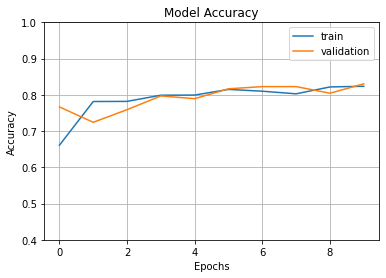

In [9]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

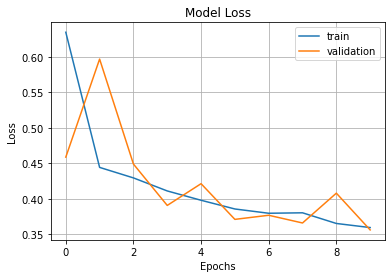

In [10]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()
fig1.savefig('loss_plot.jpg')

# size change

In [11]:
batch_size = 32
img_height = 180
img_width = 180

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 '..\\data-set\\skin-cancer\\data\\train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2637 files belonging to 2 classes.
Using 2110 files for training.


In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '..\\data-set\\skin-cancer\\data\\test',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 660 files belonging to 2 classes.
Using 132 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['benign', 'malignant']


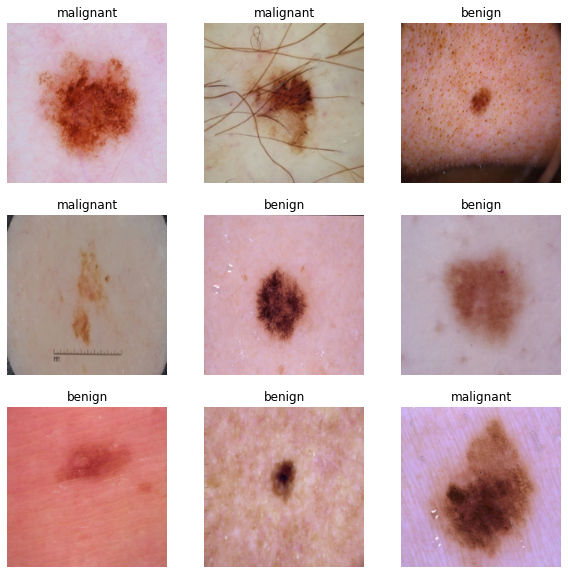

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [17]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [18]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.037569873 0.7776294


In [19]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

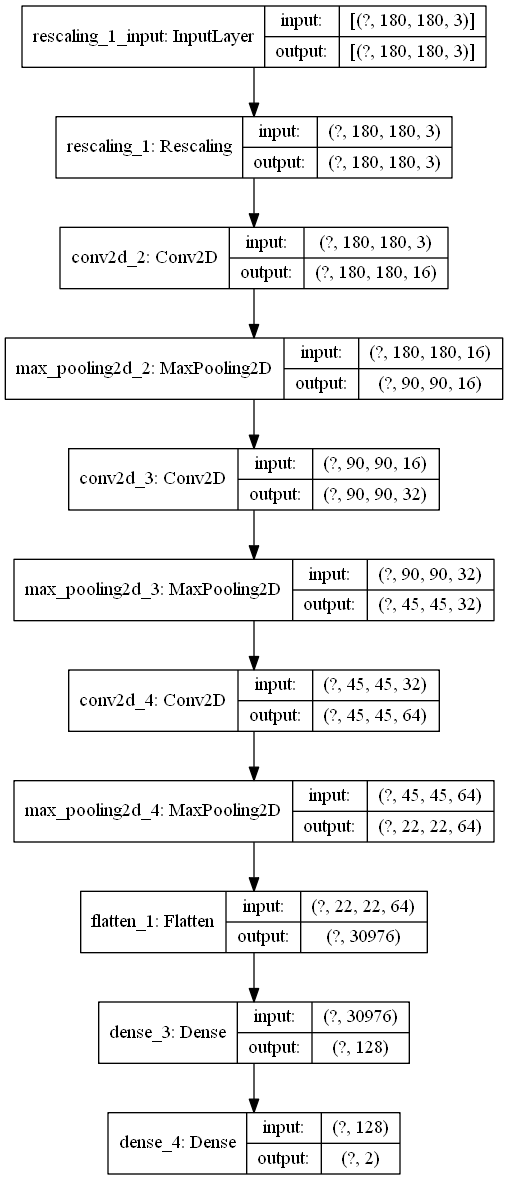

In [21]:
tf.keras.utils.plot_model(model,to_file='model.png', show_shapes=True)

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)       

In [23]:
import visualkeras
visualkeras.layered_view(model).show() 
visualkeras.layered_view(model, to_file='output.png')
visualkeras.layered_view(model, to_file='output.png',spacing=50).show() 

In [24]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=5)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    callbacks=[tensorboard_callback]
)

Epoch 1/15
66/66 [==============================] - 35s 529ms/step - loss: 0.6739 - accuracy: 0.6592 - val_loss: 0.5322 - val_accuracy: 0.7500
Epoch 2/15
66/66 [==============================] - 34s 508ms/step - loss: 0.4827 - accuracy: 0.7540 - val_loss: 0.4470 - val_accuracy: 0.7500
Epoch 3/15
66/66 [==============================] - 34s 509ms/step - loss: 0.4200 - accuracy: 0.7900 - val_loss: 0.4332 - val_accuracy: 0.7727
Epoch 4/15
66/66 [==============================] - 35s 530ms/step - loss: 0.3936 - accuracy: 0.8161 - val_loss: 0.4028 - val_accuracy: 0.7727
Epoch 5/15
66/66 [==============================] - 35s 531ms/step - loss: 0.3837 - accuracy: 0.8147 - val_loss: 0.4166 - val_accuracy: 0.7500
Epoch 6/15
66/66 [==============================] - 34s 513ms/step - loss: 0.3834 - accuracy: 0.8062 - val_loss: 0.3936 - val_accuracy: 0.8106
Epoch 7/15
66/66 [==============================] - 36s 540ms/step - loss: 0.3517 - accuracy: 0.8246 - val_loss: 0.4165 - val_accuracy: 0.7879

In [25]:
print(model.evaluate(val_ds))

5/5 [==============================] - 1s 116ms/step - loss: 0.6171 - accuracy: 0.8030
[0.6171079277992249, 0.8030303120613098]


In [28]:
from keract import get_activations, display_activations

rescaling_1_input (1, 180, 180, 3) 


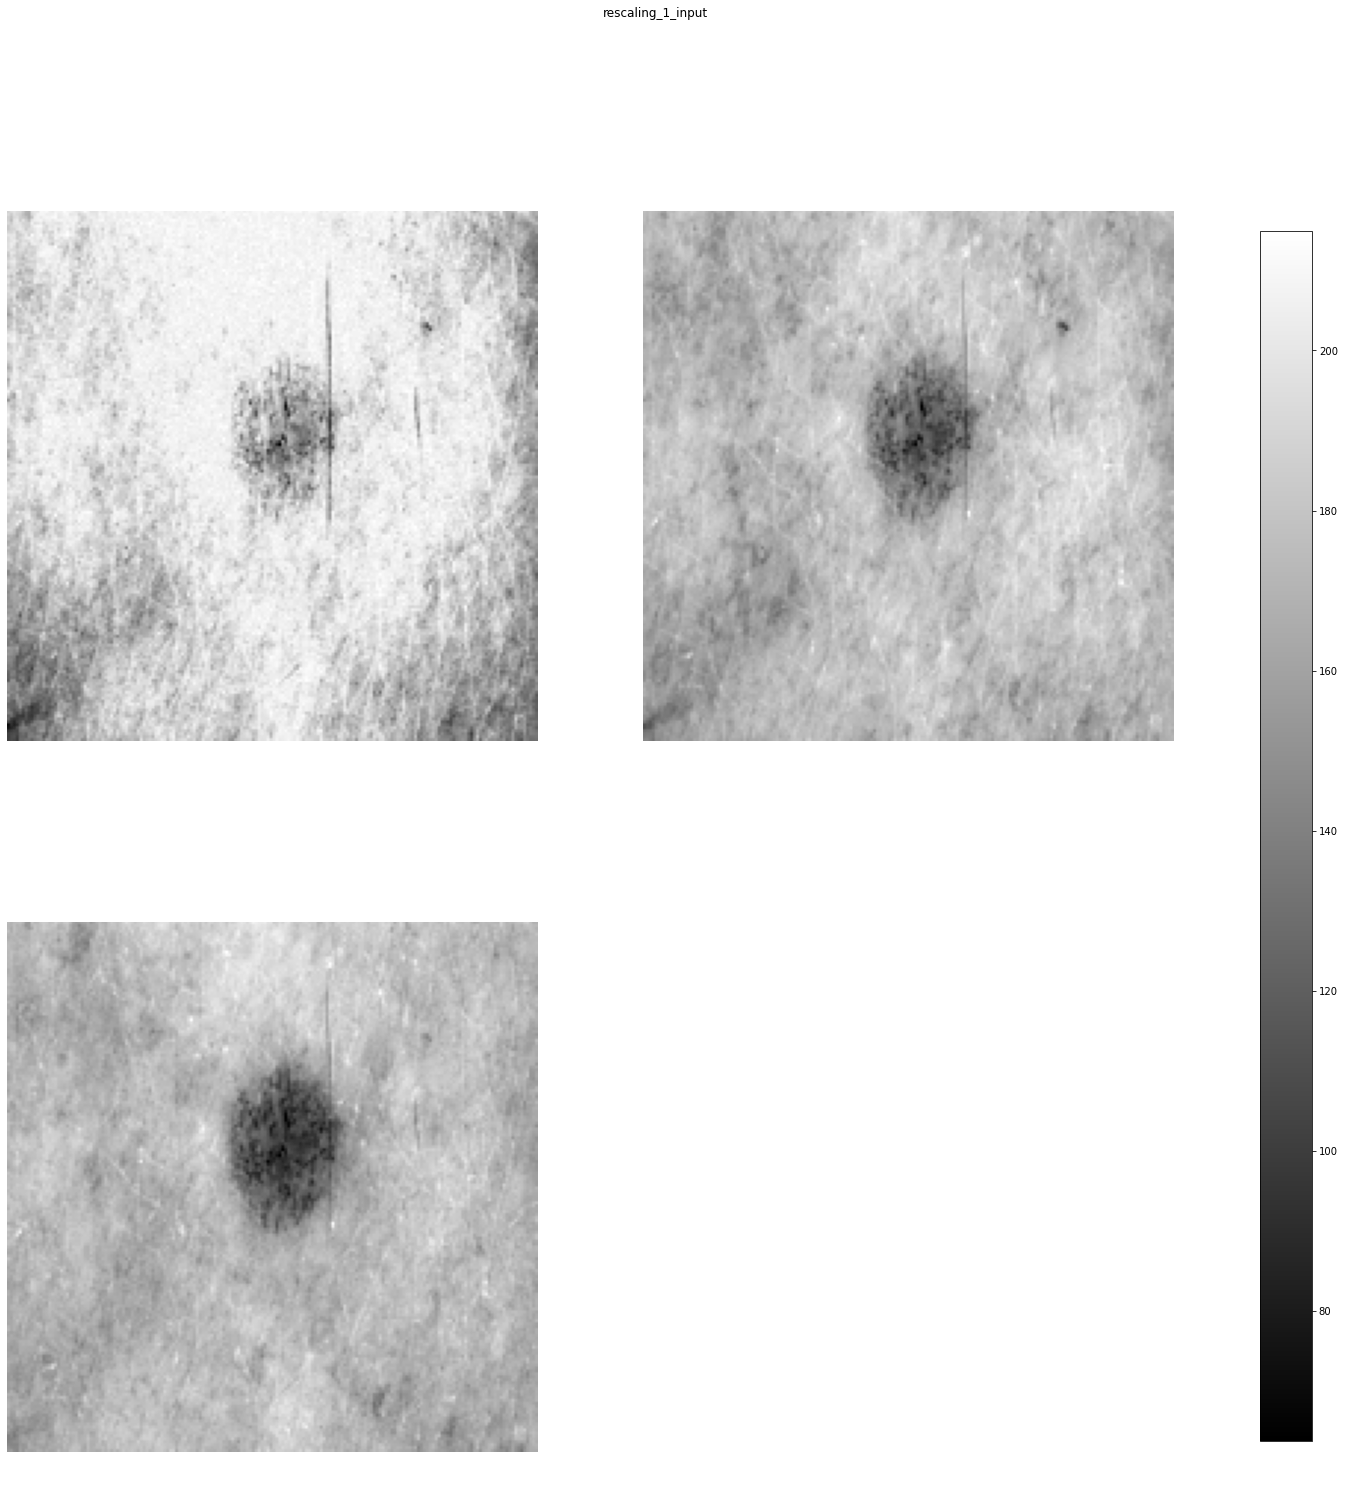

rescaling_1 (1, 180, 180, 3) 


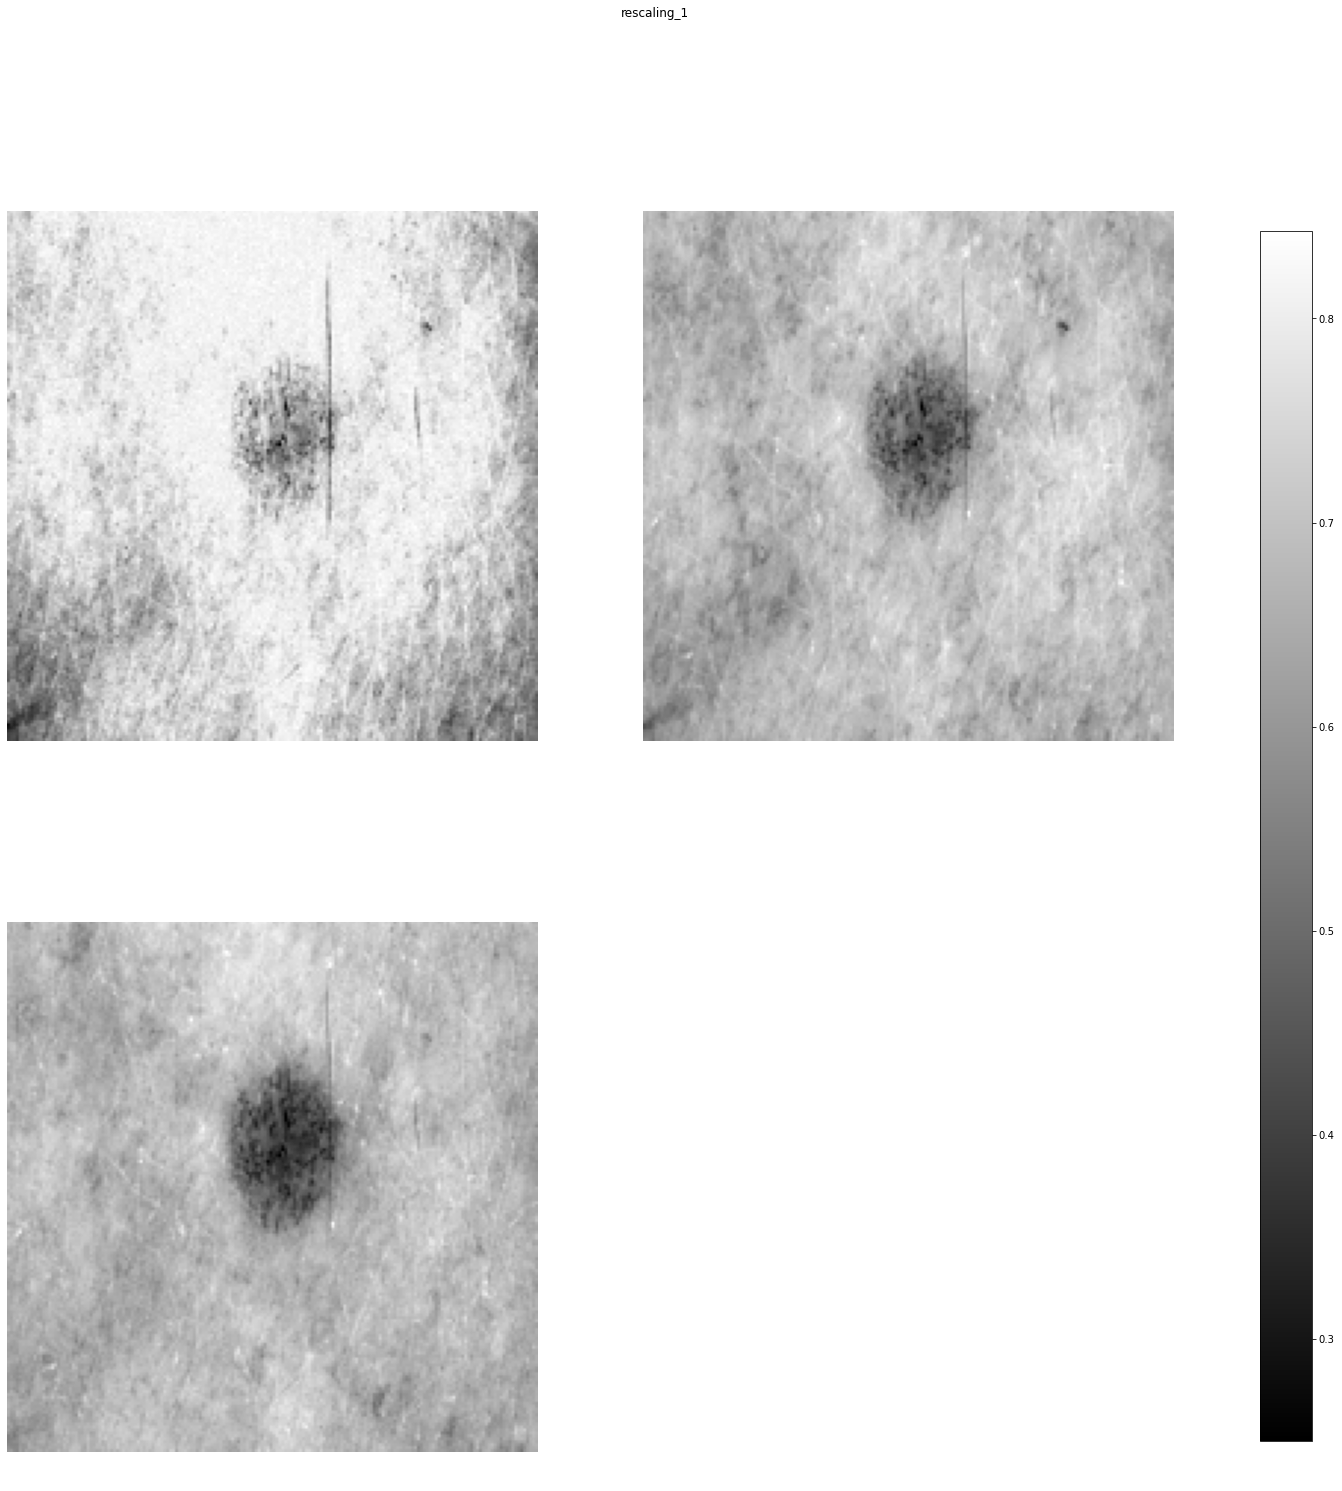

conv2d_2 (1, 180, 180, 16) 


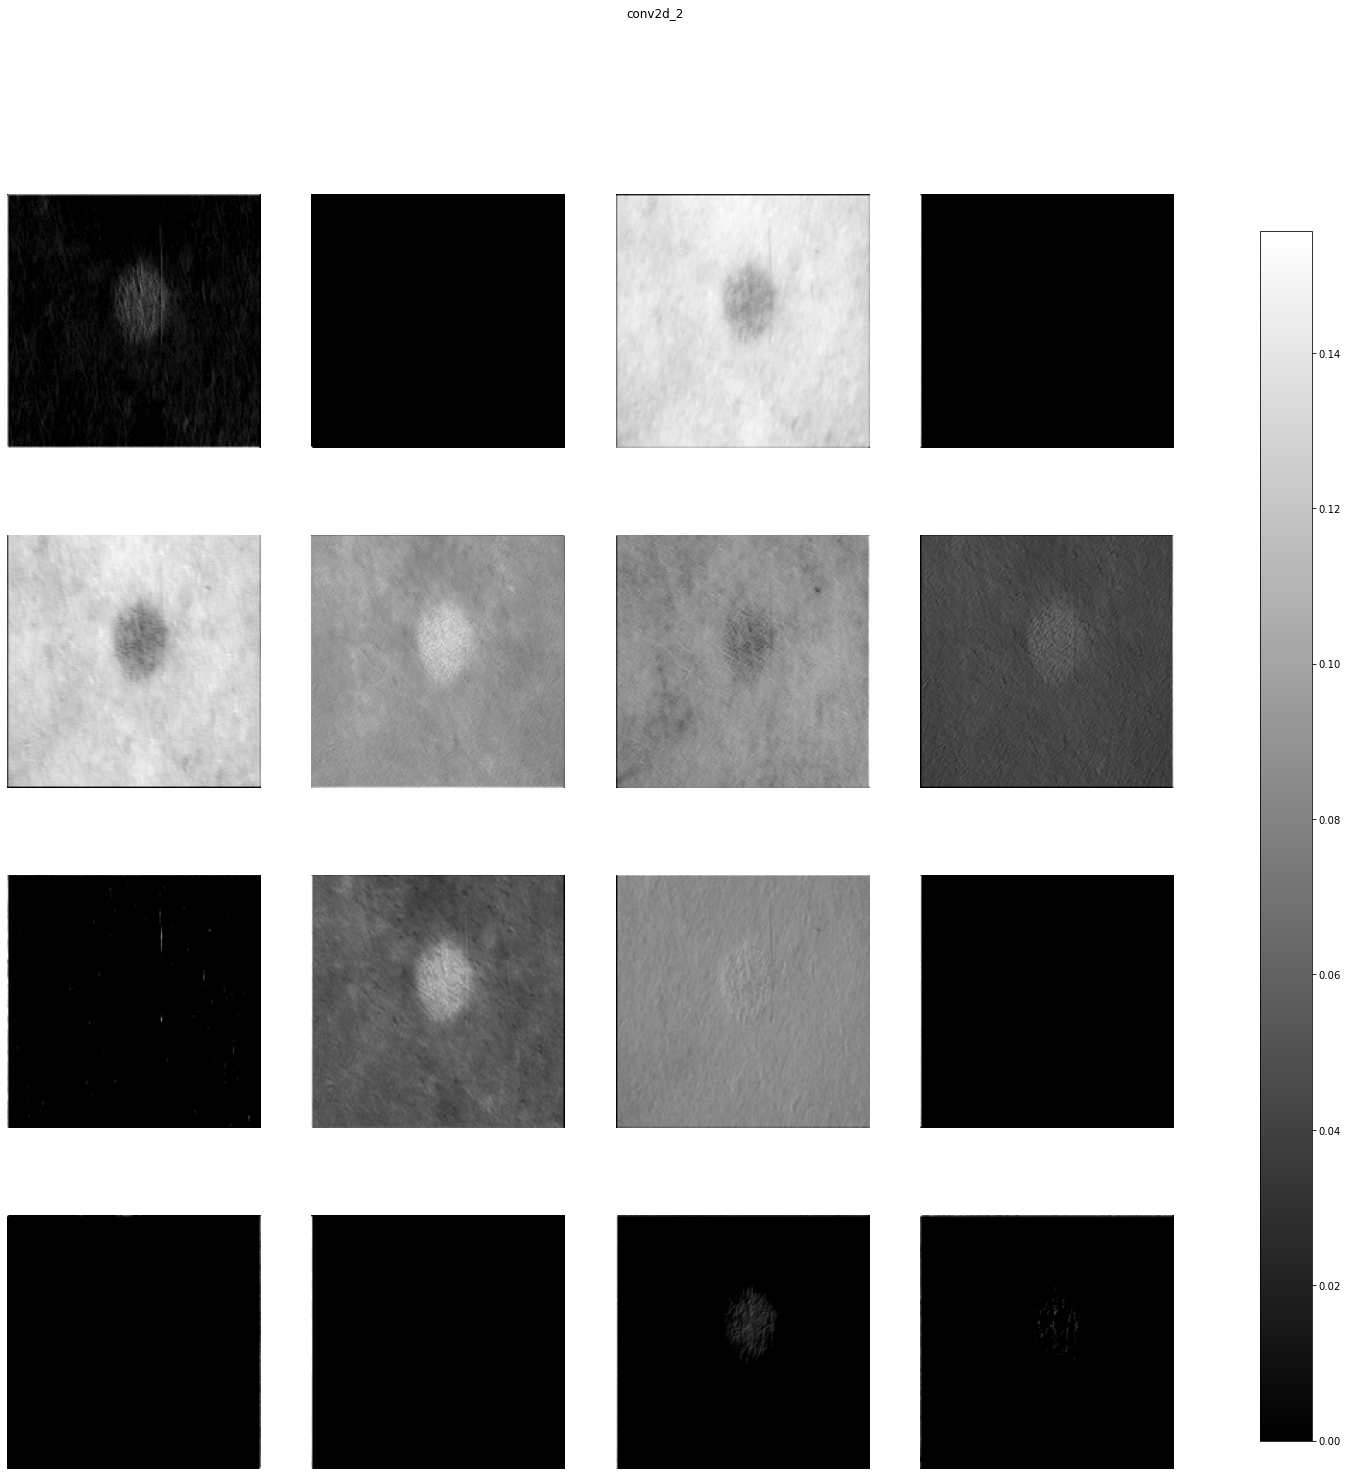

max_pooling2d_2 (1, 90, 90, 16) 


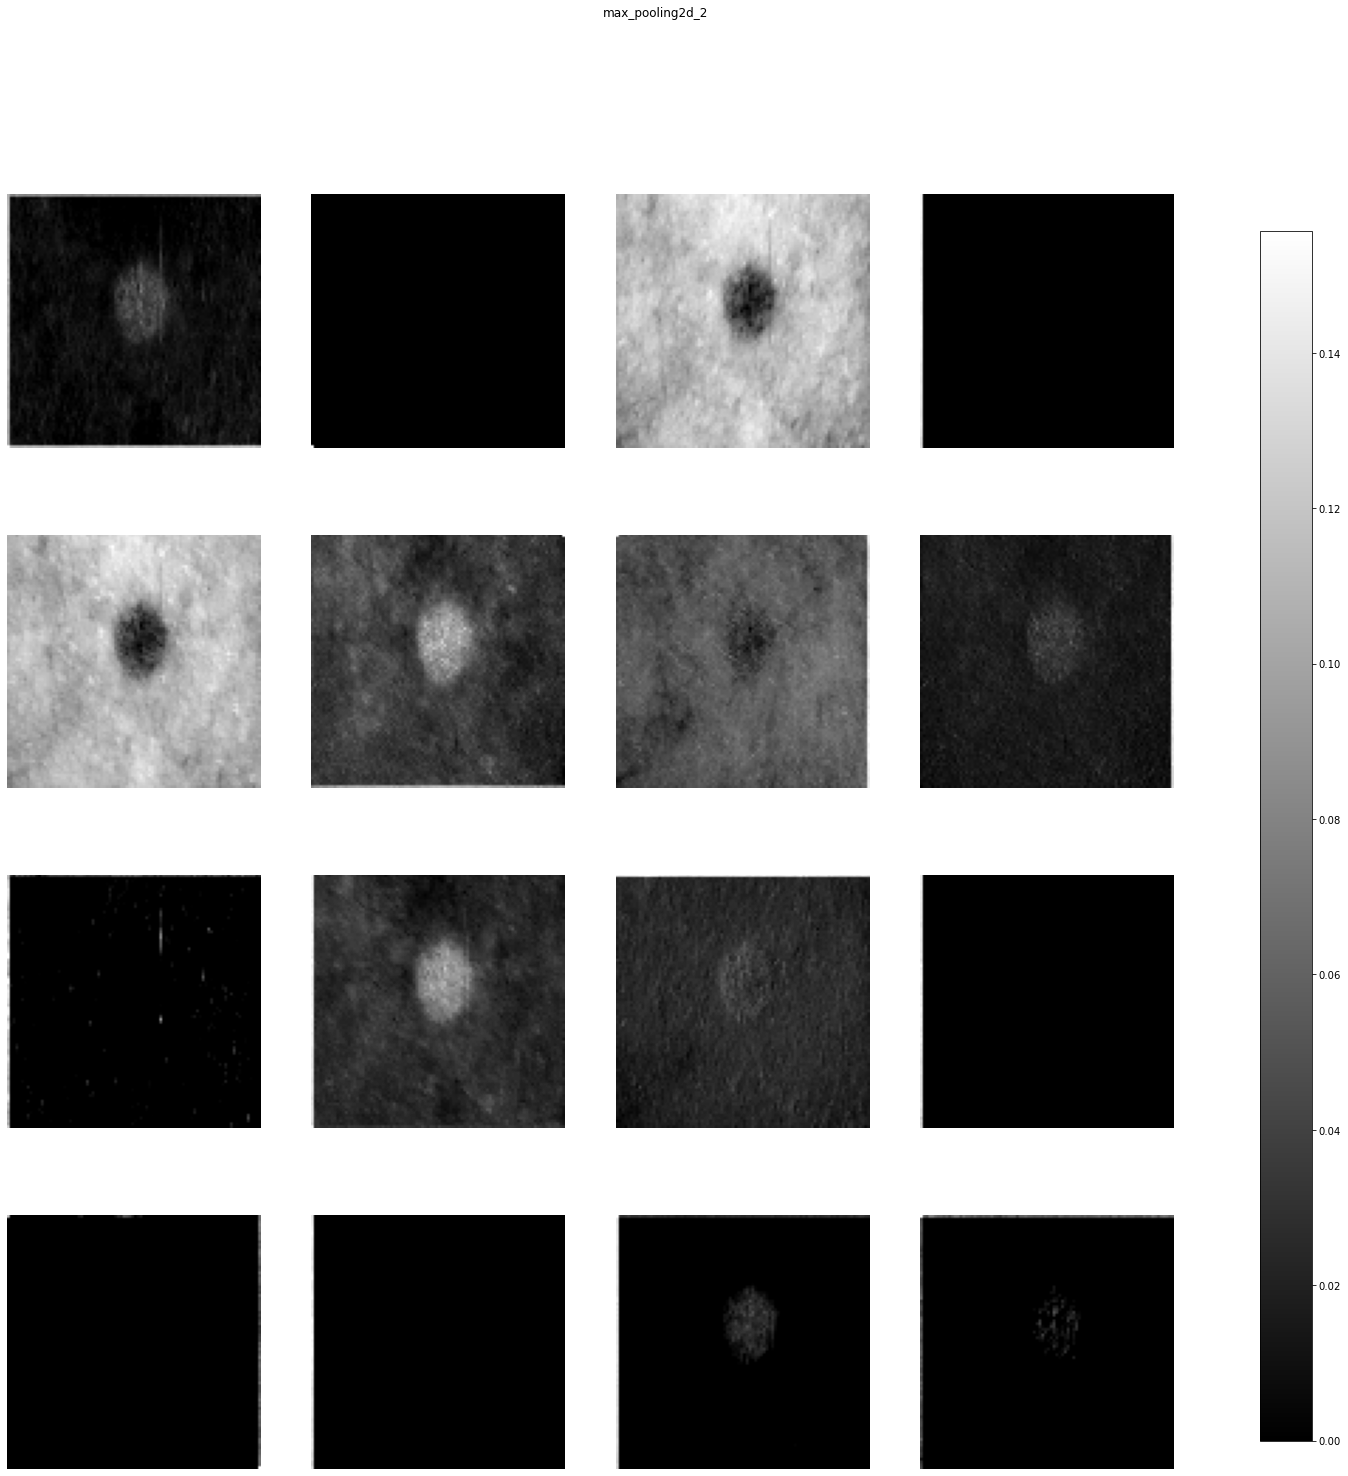

conv2d_3 (1, 90, 90, 32) 


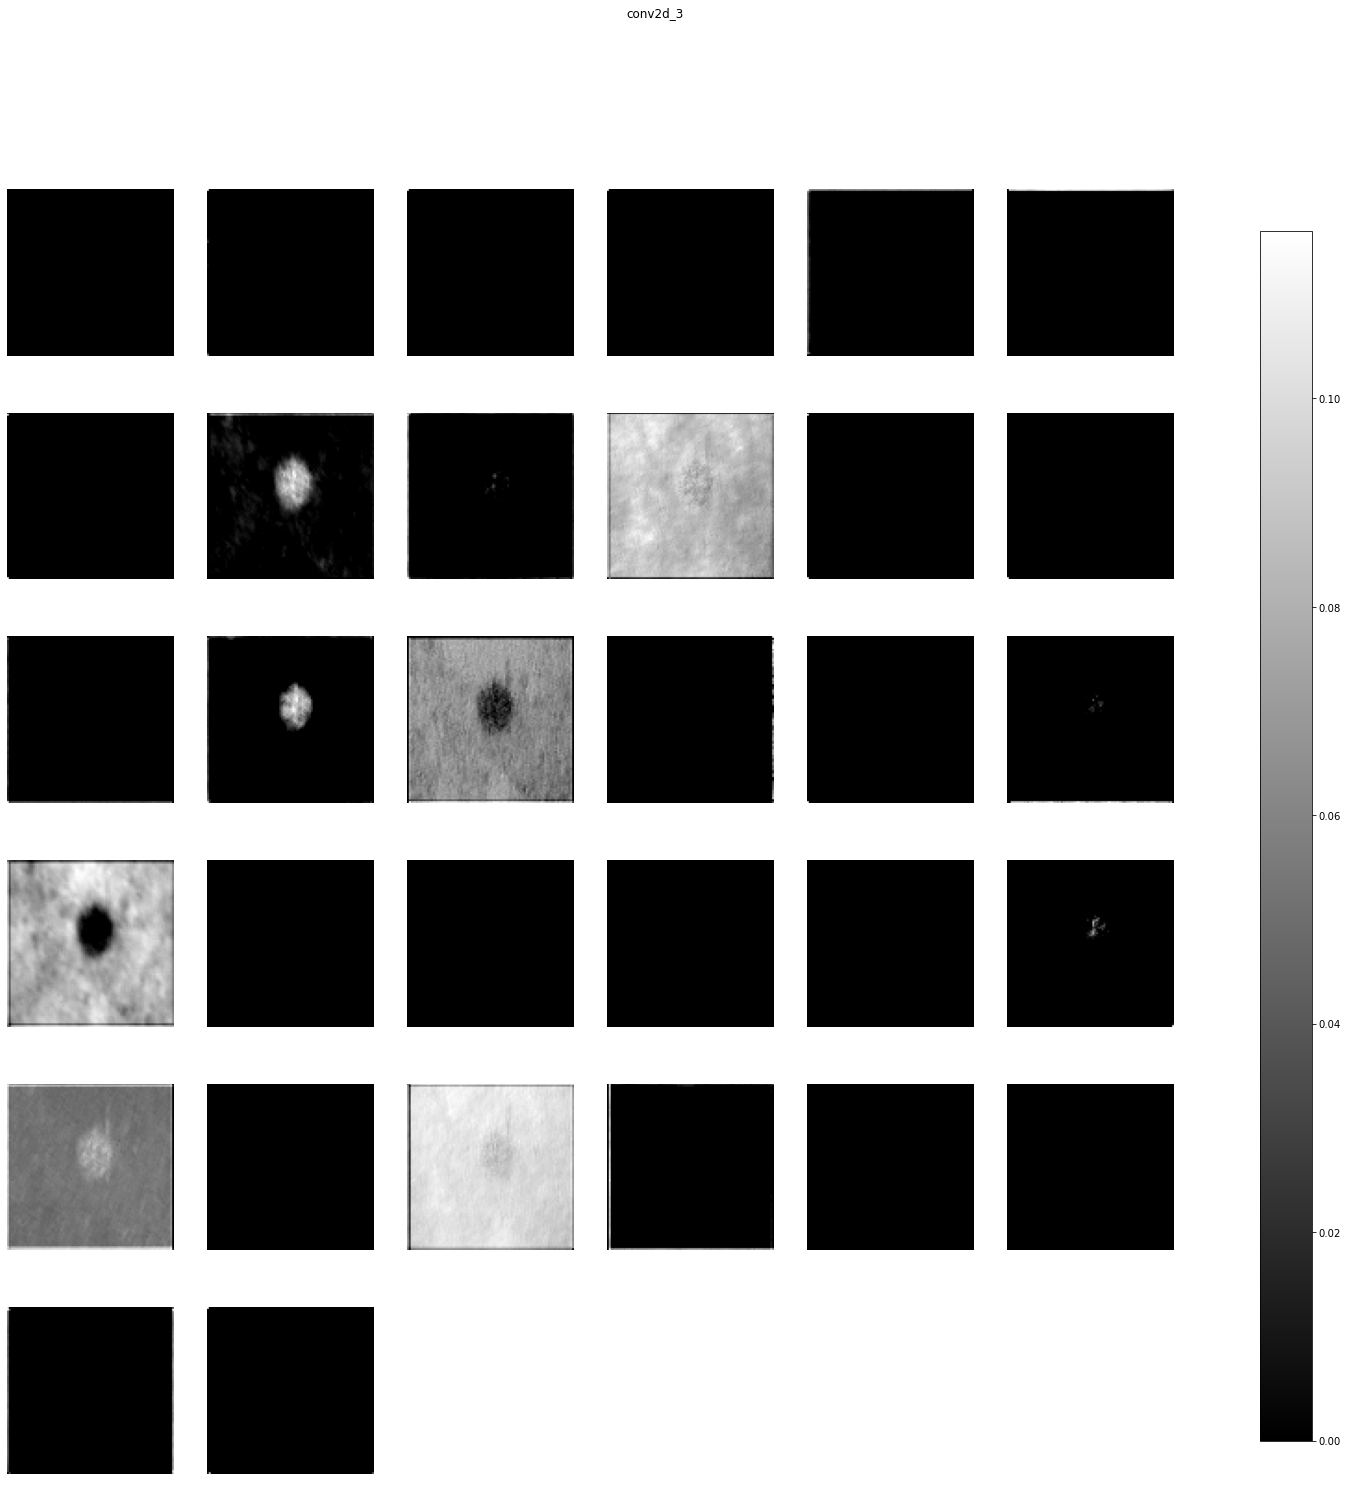

max_pooling2d_3 (1, 45, 45, 32) 


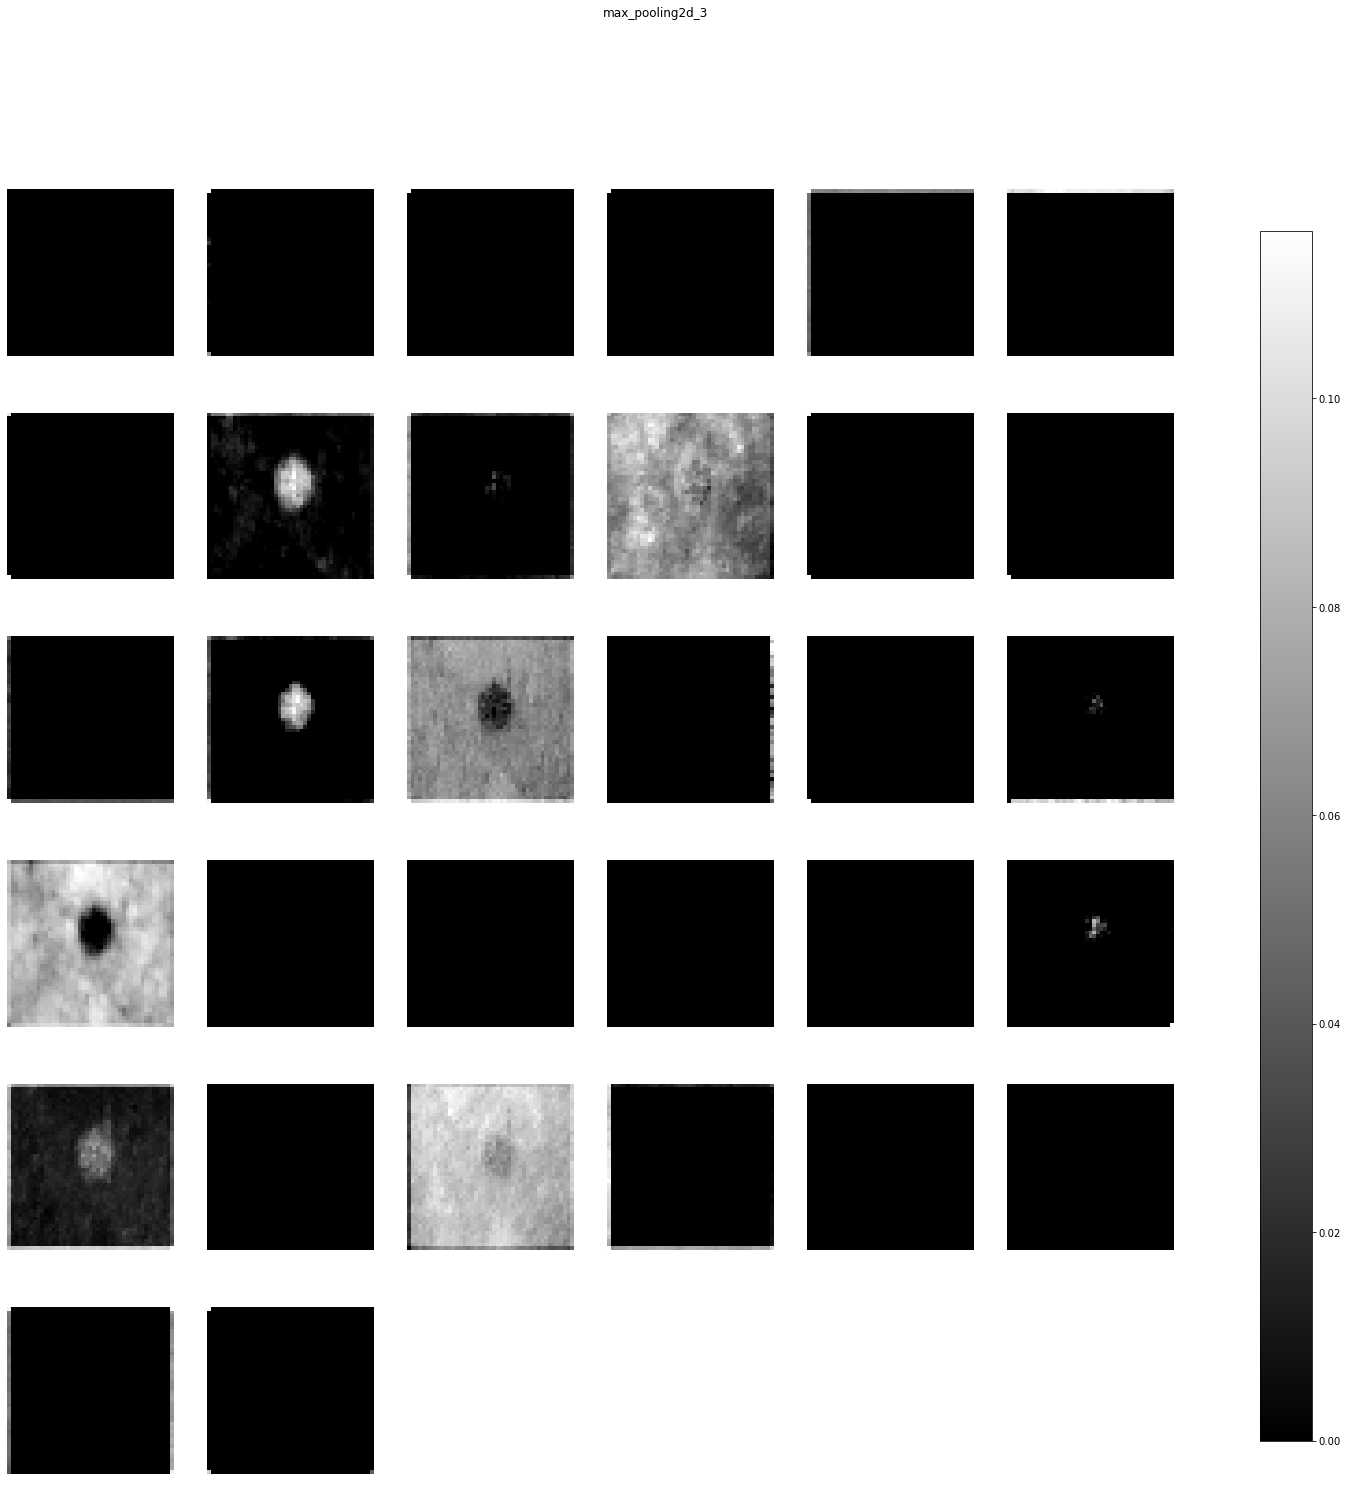

conv2d_4 (1, 45, 45, 64) 


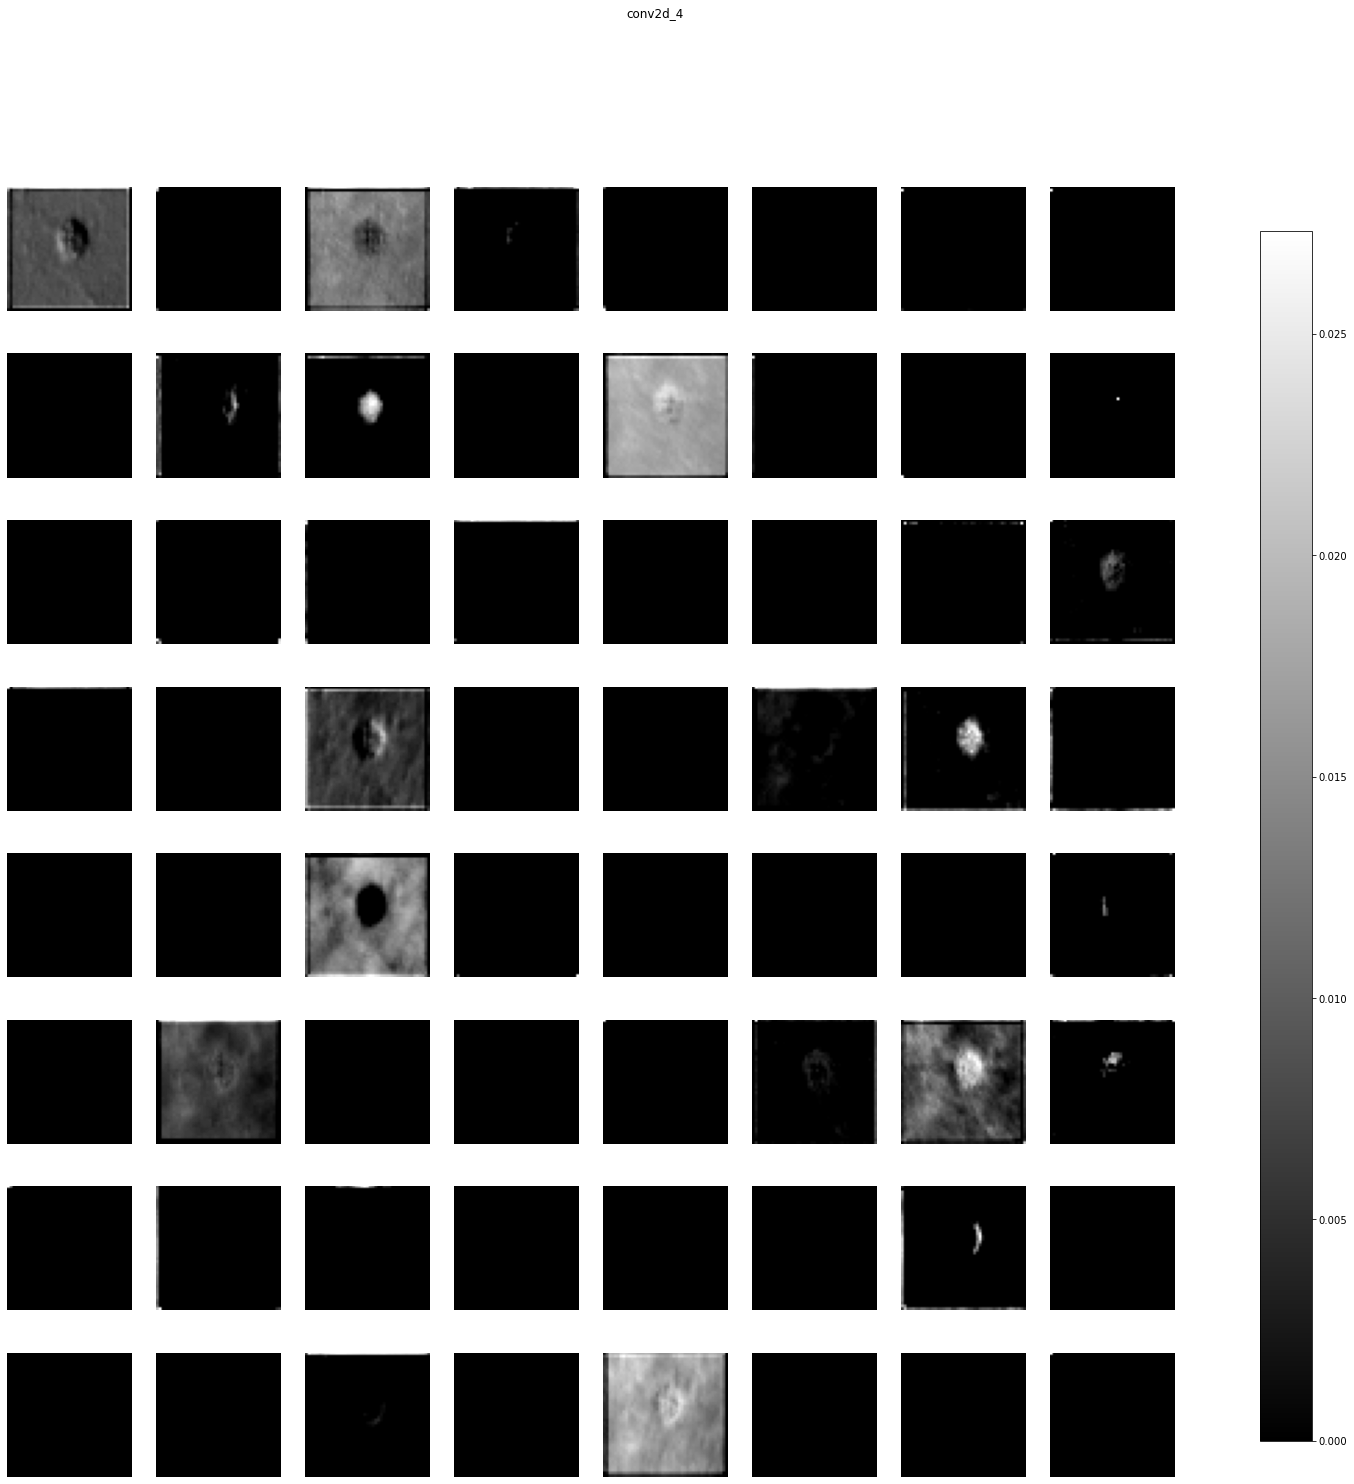

max_pooling2d_4 (1, 22, 22, 64) 


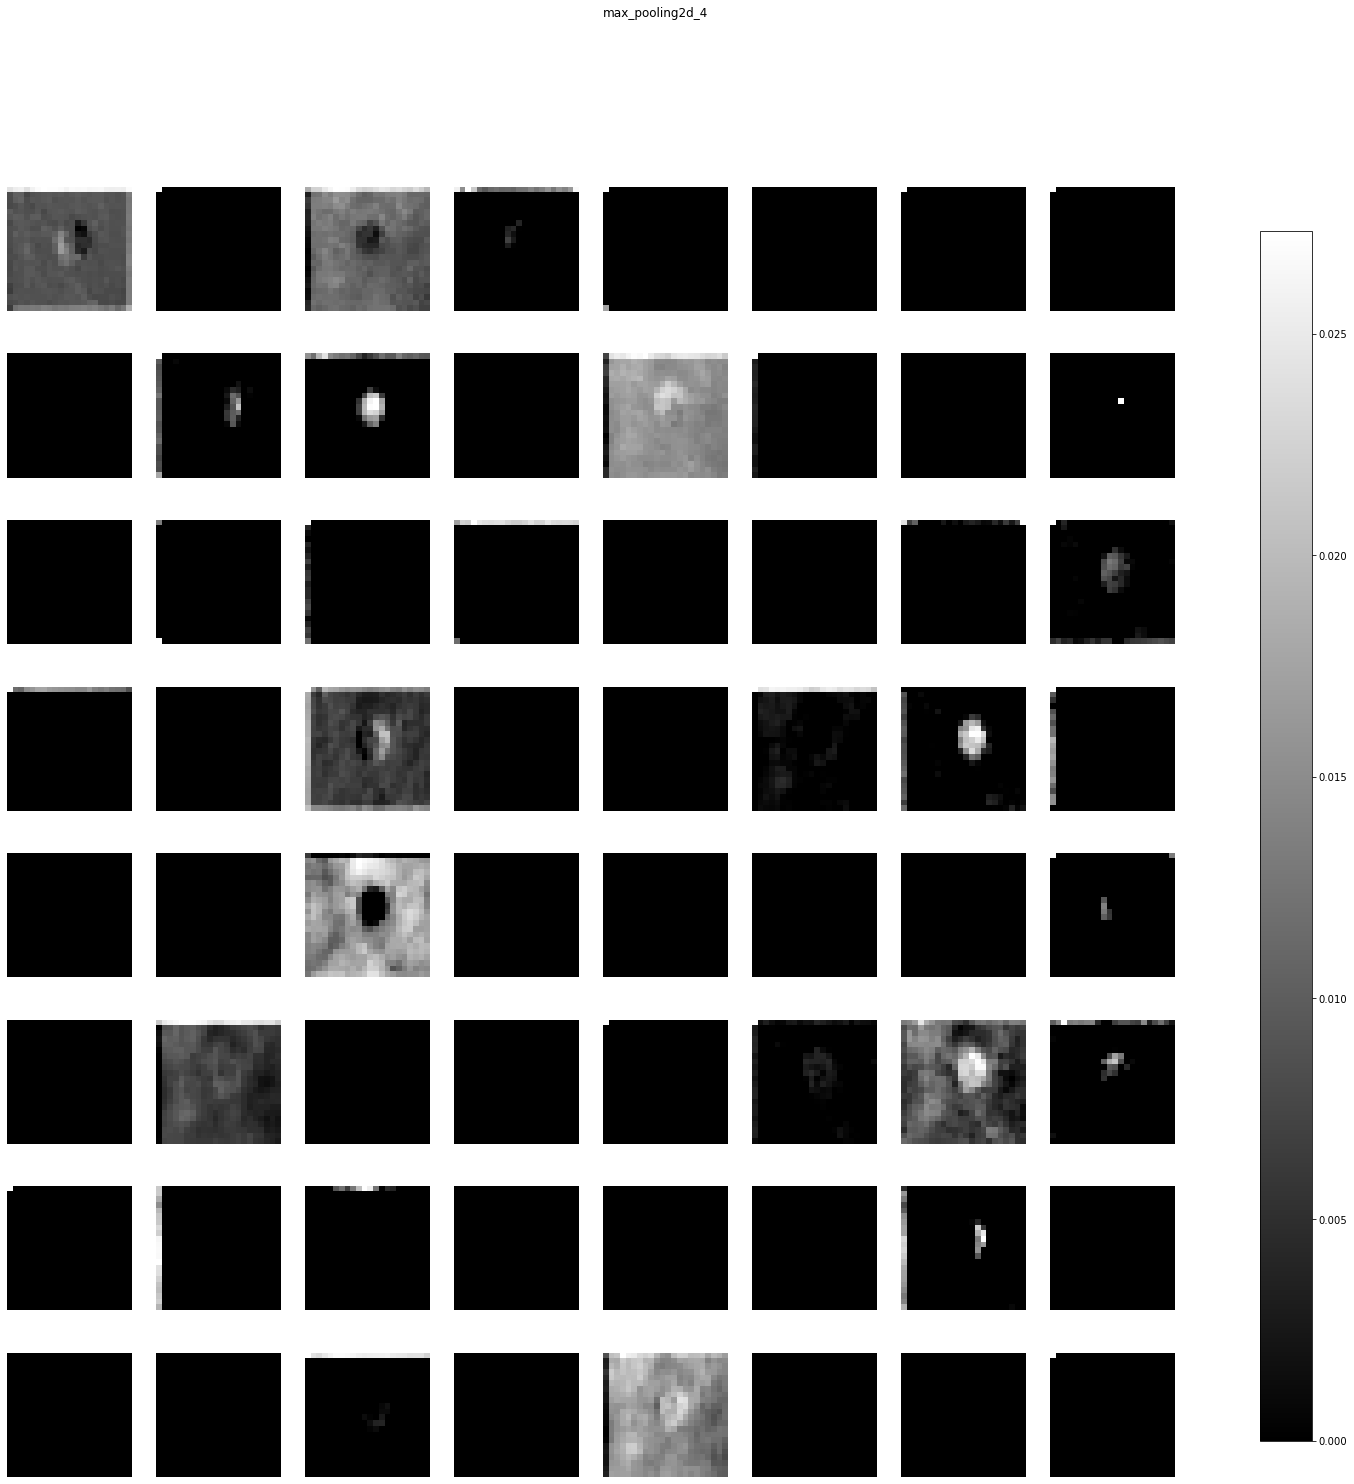

flatten_1 (1, 30976) 


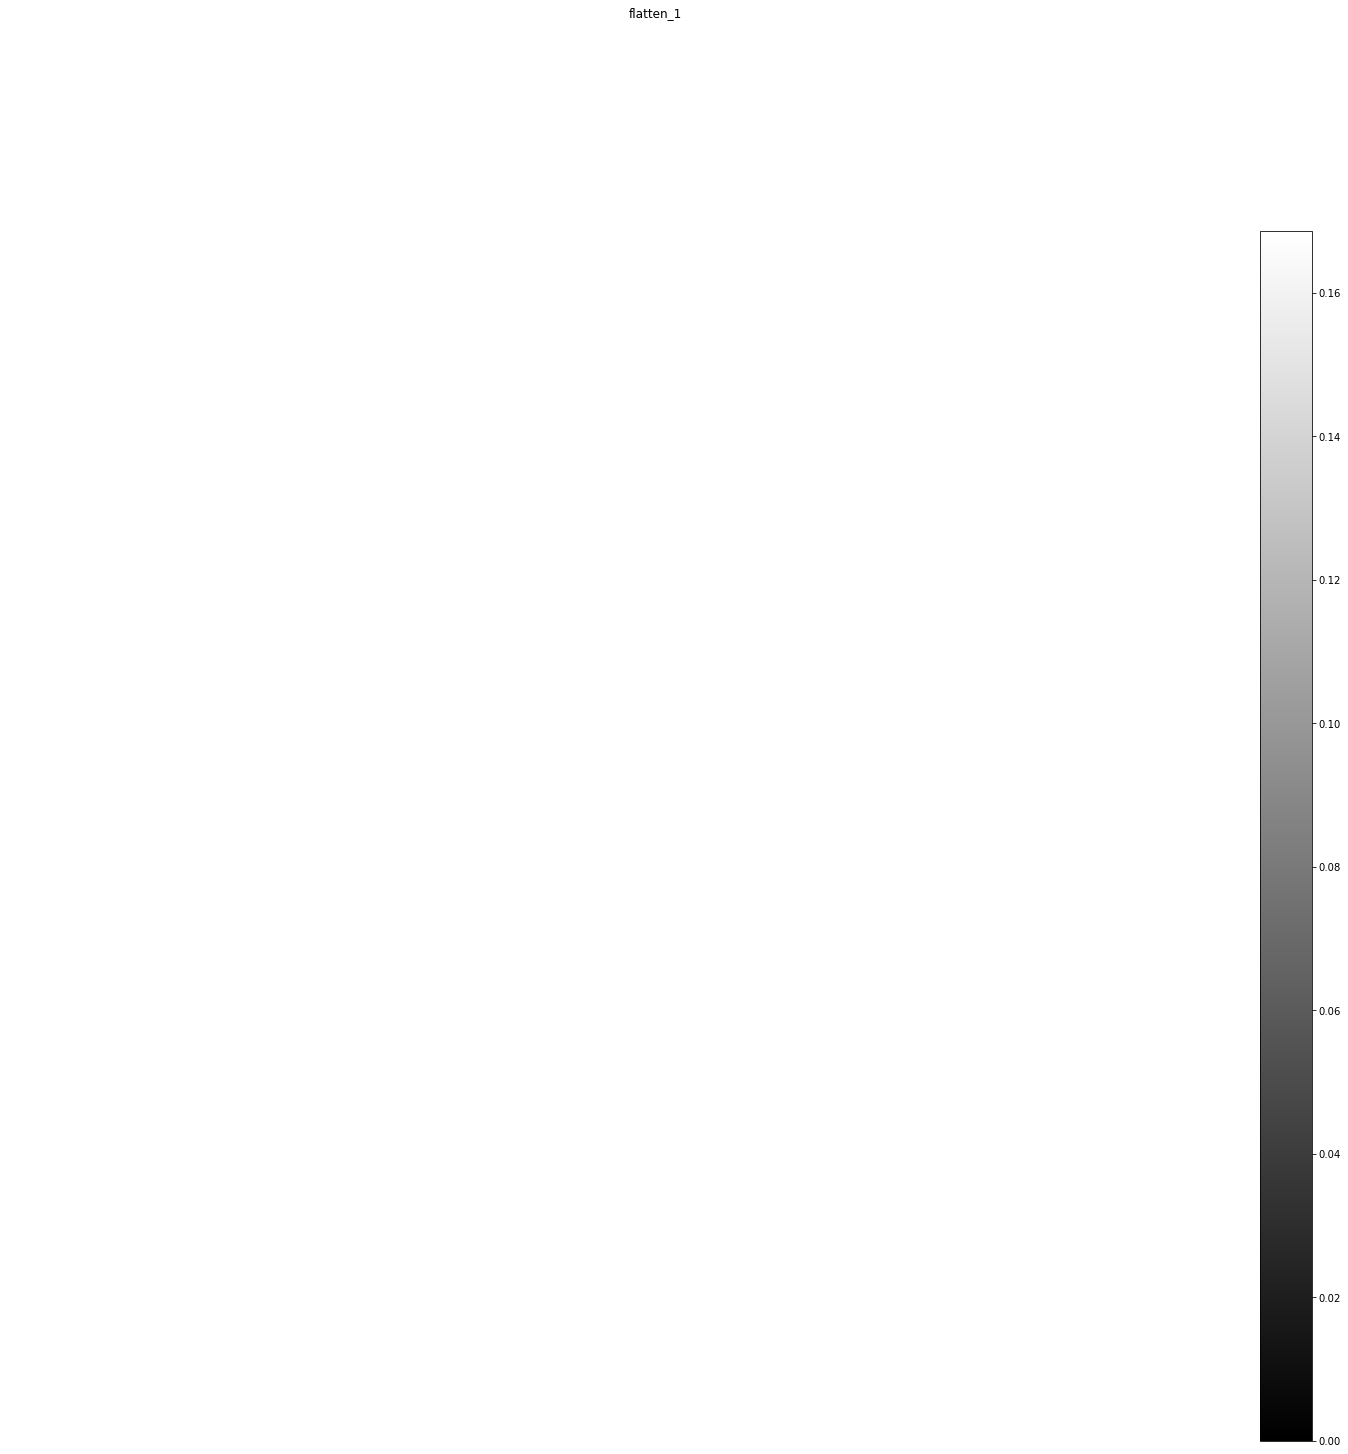

dense_3 (1, 128) 


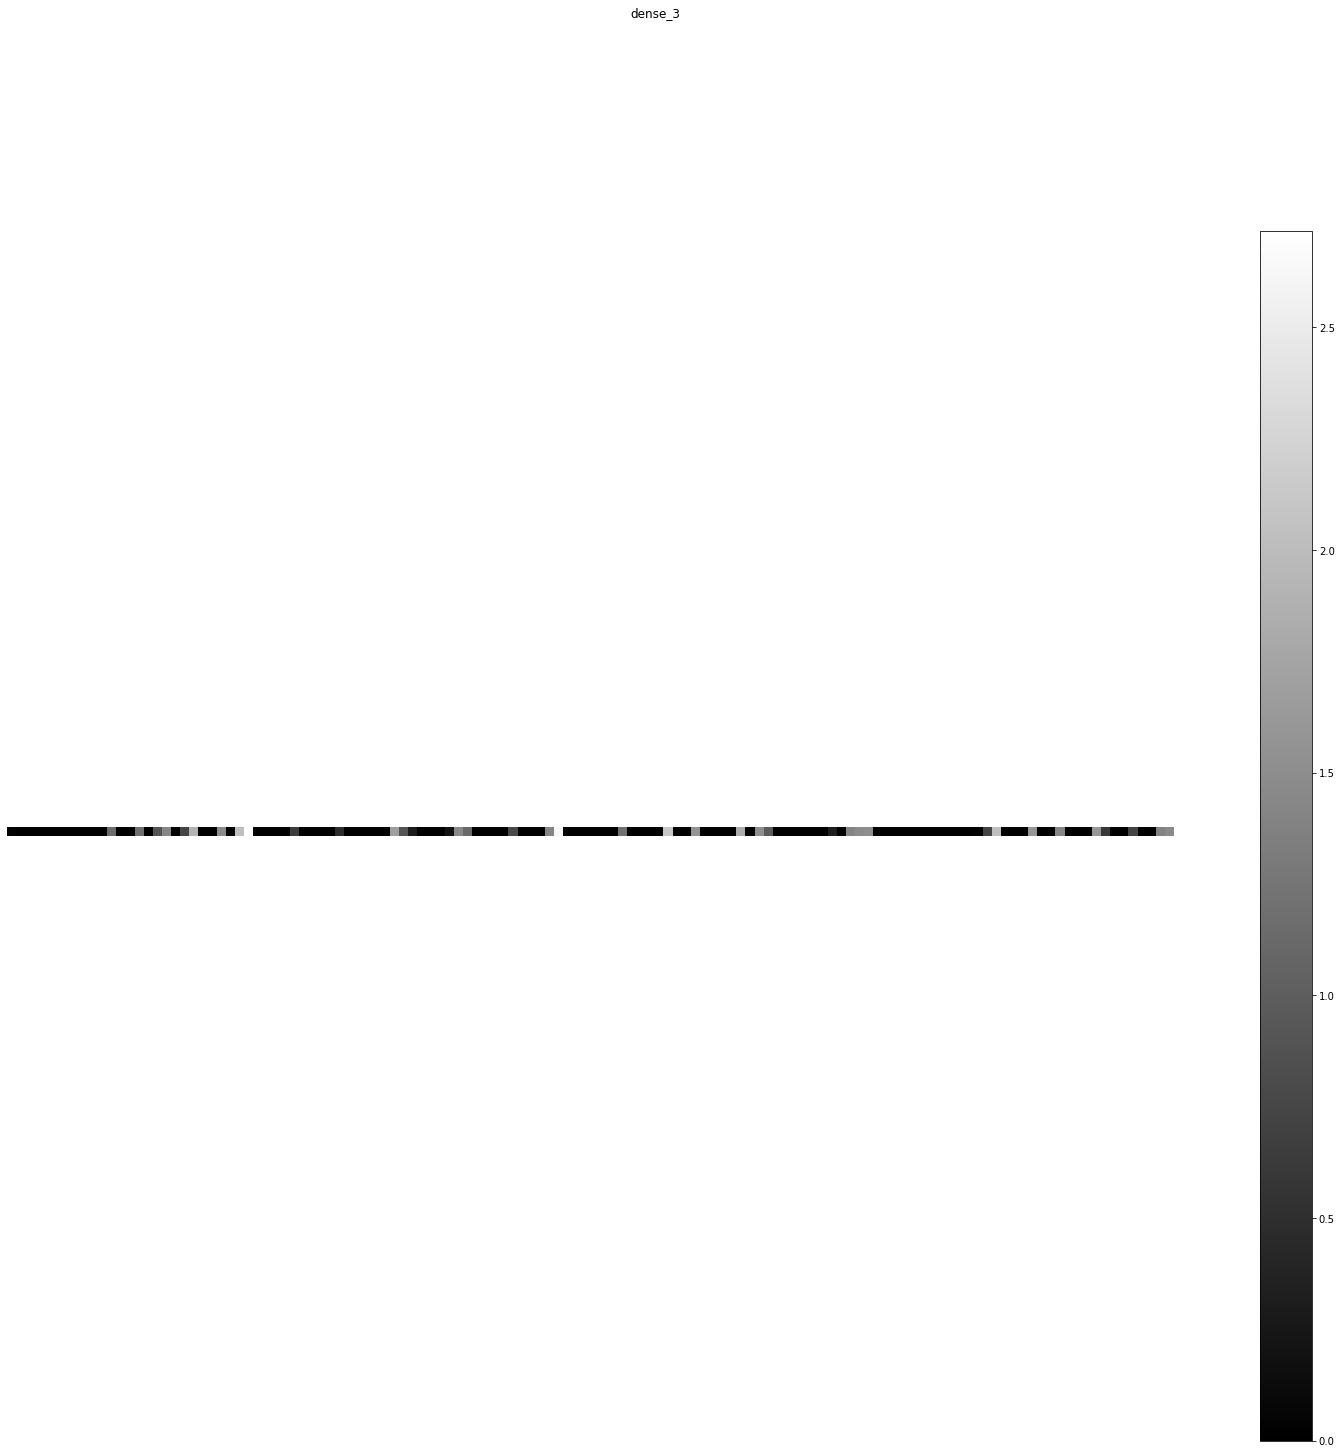

dense_4 (1, 2) 


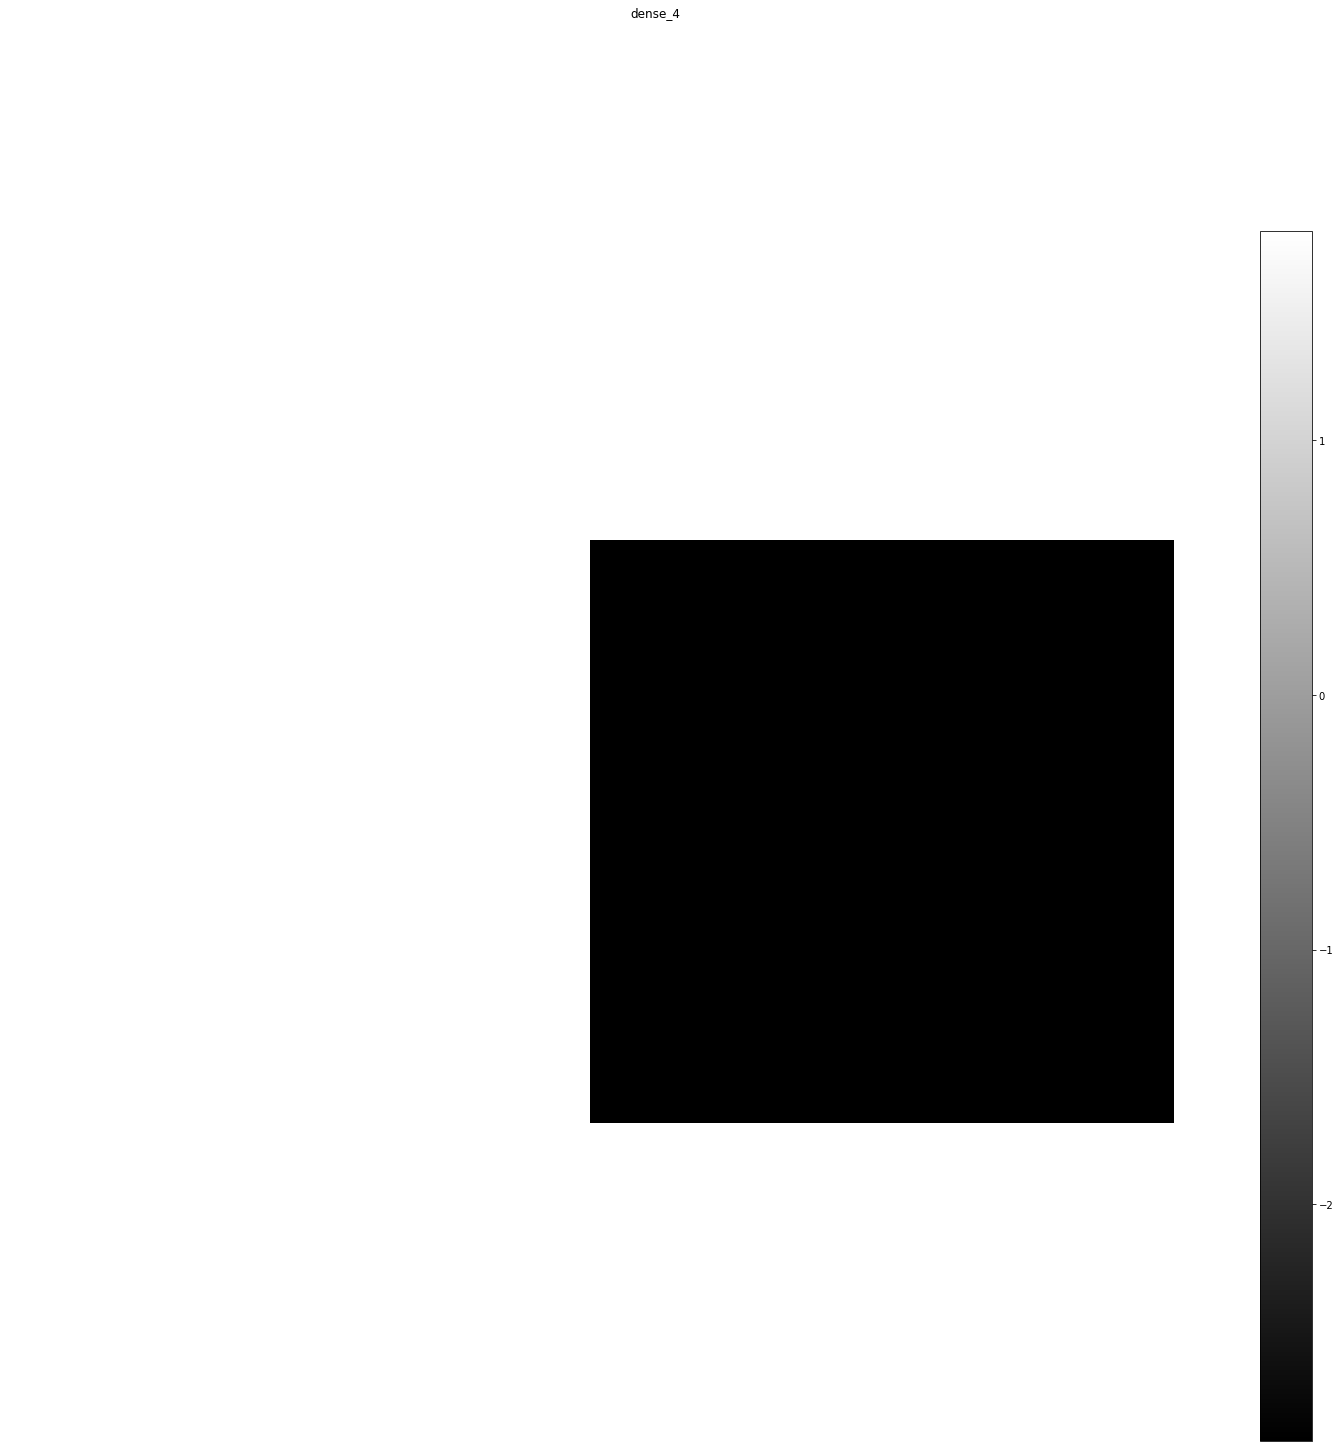

In [29]:
for image_batch, labels_batch in val_ds:
    keract_inputs=image_batch[:1]
    keract_targets=labels_batch[:1]
    break
activations= get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)


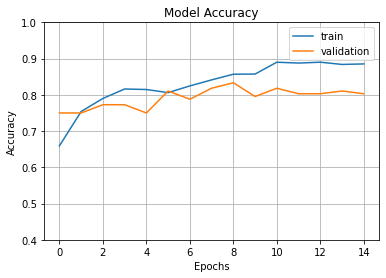

In [30]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

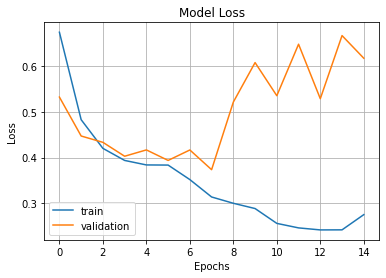

In [31]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['train', 'validation'])
plt.show()
fig1.savefig('loss_plot.jpg')

# regularizers l2

In [32]:
from keras.regularizers import l2
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)),
  layers.Dense(num_classes)
])

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 22, 22, 64)       

In [35]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=5)
epochs=15
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[tensorboard_callback]
)

Epoch 1/15
66/66 [==============================] - 28s 425ms/step - loss: 1.0119 - accuracy: 0.6697 - val_loss: 0.7427 - val_accuracy: 0.6439
Epoch 2/15
66/66 [==============================] - 35s 536ms/step - loss: 0.5518 - accuracy: 0.7427 - val_loss: 0.5512 - val_accuracy: 0.7348
Epoch 3/15
66/66 [==============================] - 35s 529ms/step - loss: 0.4916 - accuracy: 0.7626 - val_loss: 0.5499 - val_accuracy: 0.7348
Epoch 4/15
66/66 [==============================] - 35s 536ms/step - loss: 0.4810 - accuracy: 0.7782 - val_loss: 0.4845 - val_accuracy: 0.7500
Epoch 5/15
66/66 [==============================] - 38s 568ms/step - loss: 0.4727 - accuracy: 0.7834 - val_loss: 0.4714 - val_accuracy: 0.7500
Epoch 6/15
66/66 [==============================] - 34s 519ms/step - loss: 0.4465 - accuracy: 0.7957 - val_loss: 0.4846 - val_accuracy: 0.7727
Epoch 7/15
66/66 [==============================] - 35s 534ms/step - loss: 0.4512 - accuracy: 0.7905 - val_loss: 0.4899 - val_accuracy: 0.7879

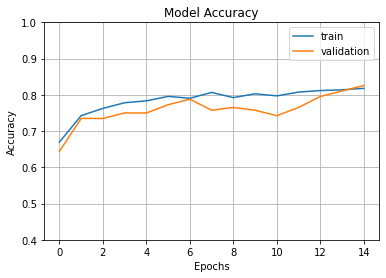

In [36]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

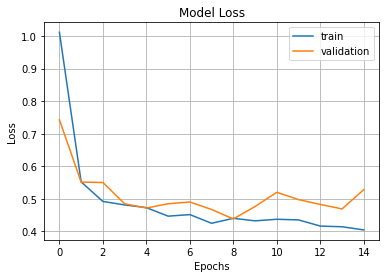

In [37]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['train', 'validation'])
plt.show()
fig1.savefig('loss_plot.jpg')

# reularizers l1

In [38]:
from keras.regularizers import l1
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu', kernel_regularizer=l1(0.01), bias_regularizer=l1(0.01)),
  layers.Dense(num_classes)
])

In [39]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 22, 22, 64)       

In [41]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=5)
epochs=15
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[tensorboard_callback]
)

Epoch 1/15
66/66 [==============================] - 28s 426ms/step - loss: 36.9389 - accuracy: 0.5758 - val_loss: 6.2762 - val_accuracy: 0.6212
Epoch 2/15
66/66 [==============================] - 30s 456ms/step - loss: 5.8259 - accuracy: 0.6493 - val_loss: 5.8327 - val_accuracy: 0.7273
Epoch 3/15
66/66 [==============================] - 31s 468ms/step - loss: 5.5882 - accuracy: 0.7166 - val_loss: 5.4706 - val_accuracy: 0.7045
Epoch 4/15
66/66 [==============================] - 36s 548ms/step - loss: 5.5340 - accuracy: 0.7536 - val_loss: 5.6002 - val_accuracy: 0.6667
Epoch 5/15
66/66 [==============================] - 33s 504ms/step - loss: 5.4554 - accuracy: 0.7659 - val_loss: 5.3531 - val_accuracy: 0.7424
Epoch 6/15
66/66 [==============================] - 35s 525ms/step - loss: 5.2397 - accuracy: 0.7801 - val_loss: 5.1819 - val_accuracy: 0.7424
Epoch 7/15
66/66 [==============================] - 33s 503ms/step - loss: 5.1570 - accuracy: 0.7773 - val_loss: 5.1835 - val_accuracy: 0.750

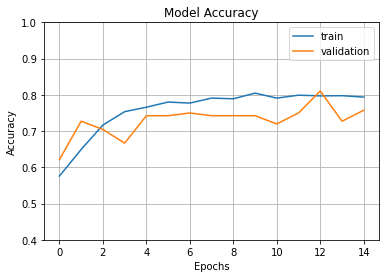

In [42]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

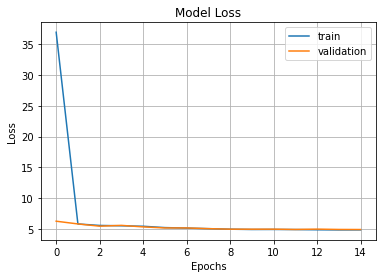

In [43]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['train', 'validation'])
plt.show()
fig1.savefig('loss_plot.jpg')

# Augmentation

In [44]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

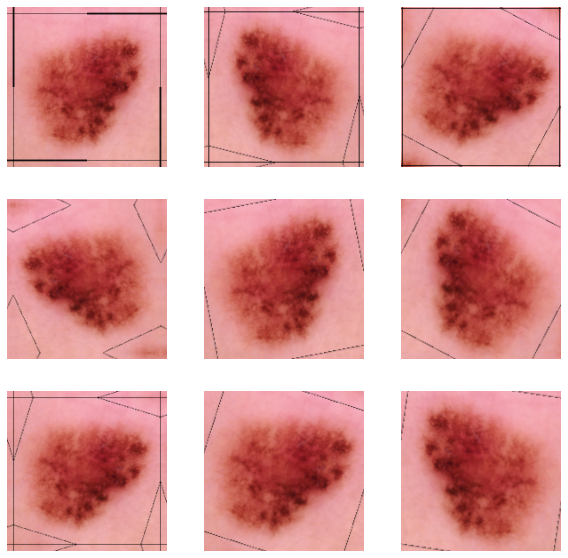

In [45]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [46]:
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [47]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 22, 22, 64)       

In [49]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=5)
epochs=15
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
    callbacks=[tensorboard_callback]
)

Epoch 1/15
66/66 [==============================] - 30s 454ms/step - loss: 0.6963 - accuracy: 0.6398 - val_loss: 0.5183 - val_accuracy: 0.7424
Epoch 2/15
66/66 [==============================] - 38s 582ms/step - loss: 0.5158 - accuracy: 0.7483 - val_loss: 0.4612 - val_accuracy: 0.7576
Epoch 3/15
66/66 [==============================] - 33s 500ms/step - loss: 0.4702 - accuracy: 0.7659 - val_loss: 0.4279 - val_accuracy: 0.7576
Epoch 4/15
66/66 [==============================] - 35s 535ms/step - loss: 0.4153 - accuracy: 0.8071 - val_loss: 0.5263 - val_accuracy: 0.7348
Epoch 5/15
66/66 [==============================] - 31s 476ms/step - loss: 0.3816 - accuracy: 0.8128 - val_loss: 0.4431 - val_accuracy: 0.7500
Epoch 6/15
66/66 [==============================] - 30s 453ms/step - loss: 0.3871 - accuracy: 0.8137 - val_loss: 0.4077 - val_accuracy: 0.7424
Epoch 7/15
66/66 [==============================] - 30s 452ms/step - loss: 0.3414 - accuracy: 0.8355 - val_loss: 0.4132 - val_accuracy: 0.8333

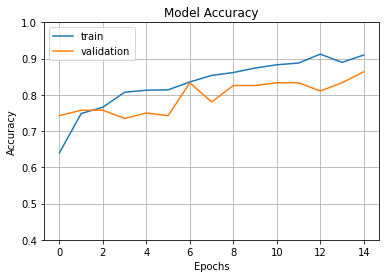

In [50]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

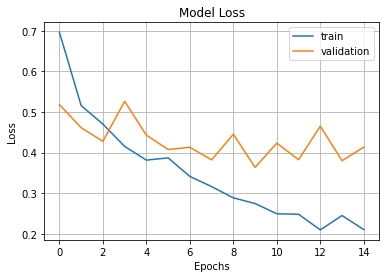

In [51]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['train', 'validation'])
plt.show()
fig1.savefig('loss_plot.jpg')

# Augmentation with regularizers

In [52]:
from keras.regularizers import l2
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128,activation='softmax', name="Output_Layer", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.002)),
  layers.Dense(num_classes)
])

In [53]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 45, 45, 64)       

In [55]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=5)
epochs=15
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
66/66 [==============================] - 32s 492ms/step - loss: 0.6771 - accuracy: 0.6351 - val_loss: 0.6528 - val_accuracy: 0.6288
Epoch 2/15
66/66 [==============================] - 35s 537ms/step - loss: 0.6157 - accuracy: 0.7076 - val_loss: 0.6145 - val_accuracy: 0.6970
Epoch 3/15
66/66 [==============================] - 35s 536ms/step - loss: 0.5822 - accuracy: 0.7474 - val_loss: 0.6072 - val_accuracy: 0.6818
Epoch 4/15
66/66 [==============================] - 38s 580ms/step - loss: 0.5602 - accuracy: 0.7630 - val_loss: 0.5613 - val_accuracy: 0.7348
Epoch 5/15
66/66 [==============================] - 39s 588ms/step - loss: 0.5435 - accuracy: 0.7720 - val_loss: 0.5451 - val_accuracy: 0.7576
Epoch 6/15
66/66 [==============================] - 41s 616ms/step - loss: 0.5360 - accuracy: 0.7607 - val_loss: 0.5383 - val_accuracy: 0.7576
Epoch 7/15
66/66 [==============================] - 40s 613ms/step - loss: 0.5104 - accuracy: 0.7882 - val_loss: 0.5341 - val_accuracy: 0.7576

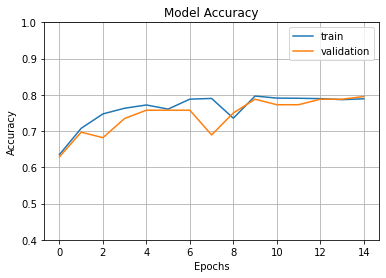

In [56]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

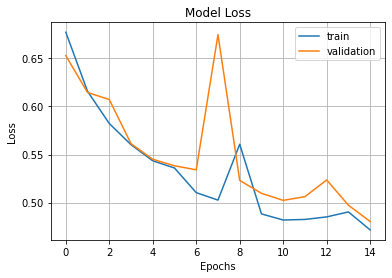

In [57]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['train', 'validation'])
plt.show()
fig1.savefig('loss_plot.jpg')

# Cutmix

In [58]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
from matplotlib import pyplot

beta = 0.5
cutmix_prob = 1.0
num_classes = 100
batch_size = 6
r = 0.7 # fixed for cutmix display

def train_augment(image,label):
  image = tf.image.resize_with_crop_or_pad(image, 36, 36) 
  image = tf.image.random_crop(image, size=[20,32, 32, 3]) 
  image = tf.image.random_flip_left_right(image)
  image = tf.cast(image, dtype=tf.float32)
  label = tf.cast(label, dtype=tf.float32)
  return image,label

def rand_bbox(size, lam):

    W = size[1] 
    H = size[2]
    cut_rat = np.sqrt(1. - lam)
    cut_w = np.int(W * cut_rat)
    cut_h = np.int(H * cut_rat)

    # uniform
    cx = np.random.randint(W)
    cy = np.random.randint(H)
    
    bbx1 = np.clip(cx - cut_w // 2, 0, W)
    bby1 = np.clip(cy - cut_h // 2, 0, H)
    bbx2 = np.clip(cx + cut_w // 2, 0, W)
    bby2 = np.clip(cy + cut_h // 2, 0, H)

    return bbx1, bby1, bbx2, bby2

In [59]:

train_dataset = train_ds .map(train_augment)
train_dataset = train_ds .batch(batch_size)
train_dataset = train_ds .shuffle(512)


In [60]:
# cutmix
for image, target in train_dataset:       
  if beta > 0 and r < cutmix_prob:
      lam = np.random.beta(beta, beta)
      rand_index = tf.random.shuffle(tf.range(len(target)))
      target_a = target
      target_b = tf.gather(target, rand_index)
      bbx1, bby1, bbx2, bby2 = rand_bbox(image.shape, lam)       
      image_a = image
      image_b = tf.gather(image, rand_index)
      mask = np.ones_like(image)
      mask[:, bbx1:bbx2, bby1:bby2, :] = 0          
      image_cutmix = tf.math.multiply(image_a,mask) + tf.math.multiply(image_b, (abs(1.-mask)))  
  break

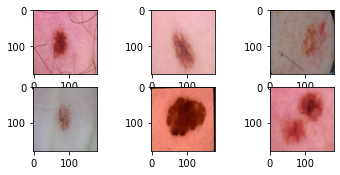

In [61]:
# Original images
from matplotlib import pyplot
for i in range(batch_size):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(image[i]/255.)
pyplot.show()

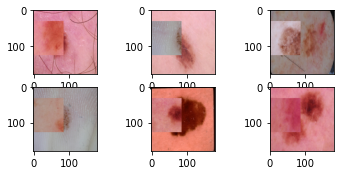

In [62]:
# Cutmix images
from matplotlib import pyplot
for i in range(batch_size):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(image_cutmix[i]/255.)
pyplot.show()

# Cutmix with regularizer

In [63]:
from keras.regularizers import l2, l1
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128,activation='softmax', name="Output_Layer", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.002)),
  layers.Dense(num_classes)
])

In [64]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [65]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=5)
epochs=15
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
66/66 [==============================] - 34s 512ms/step - loss: 4.3621 - accuracy: 0.4521 - val_loss: 4.1935 - val_accuracy: 0.4621
Epoch 2/15
66/66 [==============================] - 36s 541ms/step - loss: 4.0661 - accuracy: 0.4559 - val_loss: 3.9360 - val_accuracy: 0.4621
Epoch 3/15
66/66 [==============================] - 37s 561ms/step - loss: 3.8124 - accuracy: 0.4559 - val_loss: 3.6857 - val_accuracy: 0.4621
Epoch 4/15
66/66 [==============================] - 36s 549ms/step - loss: 3.5651 - accuracy: 0.4559 - val_loss: 3.4414 - val_accuracy: 0.4621
Epoch 5/15
66/66 [==============================] - 38s 572ms/step - loss: 3.3239 - accuracy: 0.4559 - val_loss: 3.2037 - val_accuracy: 0.4621
Epoch 6/15
66/66 [==============================] - 45s 680ms/step - loss: 3.0901 - accuracy: 0.4559 - val_loss: 2.9740 - val_accuracy: 0.4621
Epoch 7/15
66/66 [==============================] - 41s 625ms/step - loss: 2.8649 - accuracy: 0.4559 - val_loss: 2.7538 - val_accuracy: 0.4621

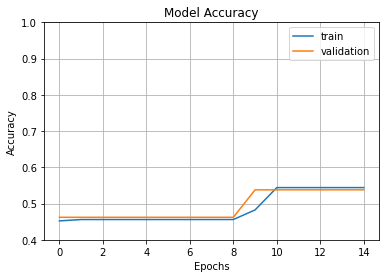

In [66]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

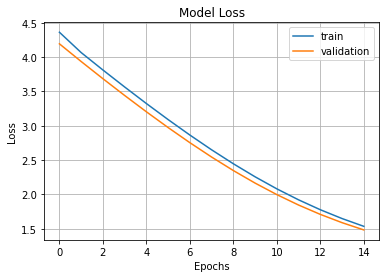

In [67]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['train', 'validation'])
plt.show()
fig1.savefig('loss_plot.jpg')

# Cutmix without regulizers

In [68]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128),
  layers.Dense(num_classes)
])

In [69]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=5)
epochs=15
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
66/66 [==============================] - 56s 853ms/step - loss: 0.7370 - accuracy: 0.6640 - val_loss: 0.4607 - val_accuracy: 0.7955
Epoch 2/15
66/66 [==============================] - 55s 827ms/step - loss: 0.4853 - accuracy: 0.7536 - val_loss: 0.4703 - val_accuracy: 0.7652
Epoch 3/15
66/66 [==============================] - 57s 858ms/step - loss: 0.4773 - accuracy: 0.7621 - val_loss: 0.4023 - val_accuracy: 0.7879
Epoch 4/15
66/66 [==============================] - 55s 827ms/step - loss: 0.4316 - accuracy: 0.7777 - val_loss: 0.3938 - val_accuracy: 0.7955
Epoch 5/15
66/66 [==============================] - 58s 874ms/step - loss: 0.4018 - accuracy: 0.8104 - val_loss: 0.4005 - val_accuracy: 0.8030
Epoch 6/15
66/66 [==============================] - 59s 892ms/step - loss: 0.4215 - accuracy: 0.7891 - val_loss: 0.3939 - val_accuracy: 0.8030
Epoch 7/15
66/66 [==============================] - 62s 945ms/step - loss: 0.3933 - accuracy: 0.8133 - val_loss: 0.4399 - val_accuracy: 0.7500

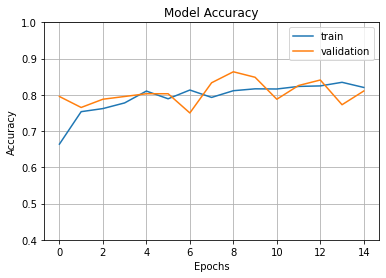

In [71]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

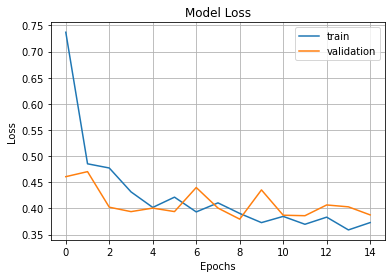

In [72]:
fig1 = plt.gcf()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['train', 'validation'])
plt.show()
fig1.savefig('loss_plot.jpg')

In [74]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 17316), started 0:01:00 ago. (Use '!kill 17316' to kill it.)

In [86]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
 '..\\data-set\\cifar-10\\data',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 58794 files belonging to 2 classes.
Using 47036 files for training.


In [87]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '..\\data-set\\cifar-10\\data',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 58794 files belonging to 2 classes.
Using 11758 files for validation.


In [90]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True,patience=5)
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
7840/7840 [==============================] - 1206s 154ms/step - loss: 0.4576 - accuracy: 0.8138 - val_loss: 0.4418 - val_accuracy: 0.8140
Epoch 2/15
7840/7840 [==============================] - 1063s 136ms/step - loss: 0.4572 - accuracy: 0.8120 - val_loss: 0.4464 - val_accuracy: 0.8116
Epoch 3/15
7840/7840 [==============================] - 1071s 137ms/step - loss: 0.4546 - accuracy: 0.8128 - val_loss: 0.4667 - val_accuracy: 0.7841
Epoch 4/15
6706/7840 [========================>.....] - ETA: 2:28 - loss: 0.4533 - accuracy: 0.8118

KeyboardInterrupt: 